In [1]:
~Author Pratham S Sanshi

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### input features = model, year, transmission , mileage, fuelType, tax and engine_size
### Output Result = Car_Price

### Data-set Details:- 
### 8 features/colums
### Null count=Nil
### Rows=10668


In [8]:
os.chdir('D:\\project_ds')
df1 = pd.read_csv('audi.csv')
print (df1)

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]


In [6]:
print (df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB
None
  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diese

In [5]:
# define x
X = df1.iloc[:,[0,1,3,4,5,6,7,8]].values
display (X.shape)
display (X)

(10668, 8)

array([[' A1', 2017, 'Manual', ..., 150, 55.4, 1.4],
       [' A6', 2016, 'Automatic', ..., 20, 64.2, 2.0],
       [' A1', 2016, 'Manual', ..., 30, 55.4, 1.4],
       ...,
       [' A3', 2020, 'Manual', ..., 150, 49.6, 1.0],
       [' Q3', 2017, 'Automatic', ..., 150, 47.9, 1.4],
       [' Q3', 2016, 'Manual', ..., 150, 47.9, 1.4]], dtype=object)

In [6]:
#define y ->price
Y = df1.iloc[:,[2]].values
display (Y.shape)
display (Y)

(10668, 1)

array([[12500],
       [16500],
       [11000],
       ...,
       [17199],
       [19499],
       [15999]], dtype=int64)

In [7]:
#Preprocessing.

#model->Label encoding
#Fueltype ->Label encoding
#transmission-> OneHotencoding
#X->StandardScaler

from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,-4] = le2.fit_transform(X[:,-4])
print (" The 2d array X =", X)
print("\n\n")

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X = ct.fit_transform(X)
display (X.shape)
display ("oneHot encoding on transmission",pd.DataFrame(X))
print("\n\n")

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
display ("Standardization = ",pd.DataFrame(X))

 The 2d array X = [[0 2017 'Manual' ... 150 55.4 1.4]
 [5 2016 'Automatic' ... 20 64.2 2.0]
 [0 2016 'Manual' ... 30 55.4 1.4]
 ...
 [2 2020 'Manual' ... 150 49.6 1.0]
 [9 2017 'Automatic' ... 150 47.9 1.4]
 [9 2016 'Manual' ... 150 47.9 1.4]]





(10668, 10)

'oneHot encoding on transmission'

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0,2017,15735,2,150,55.4,1.4
1,1.0,0.0,0.0,5,2016,36203,0,20,64.2,2.0
2,0.0,1.0,0.0,0,2016,29946,2,30,55.4,1.4
3,1.0,0.0,0.0,3,2017,25952,0,145,67.3,2.0
4,0.0,1.0,0.0,2,2019,1998,2,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,0.0,1.0,0.0,2,2020,4018,2,145,49.6,1.0
10664,0.0,1.0,0.0,2,2020,1978,2,150,49.6,1.0
10665,0.0,1.0,0.0,2,2020,609,2,150,49.6,1.0
10666,1.0,0.0,0.0,9,2017,8646,2,150,47.9,1.4


'Standardization = '

,0,1,2,3,4,5,6,7,8,9
0,-0.583268,1.200728,-0.712333,-1.123544,-0.046450,-0.386836,1.050783,0.357147,0.357550,-0.880218
1,1.714479,-0.832828,-0.712333,-0.160831,-0.507834,0.483989,-0.954181,-1.578323,1.037130,0.114925
2,-0.583268,1.200728,-0.712333,-1.123544,-0.507834,0.217781,1.050783,-1.429440,0.357550,-0.880218
3,1.714479,-0.832828,-0.712333,-0.545916,-0.046450,0.047853,-0.954181,0.282706,1.276528,0.114925
4,-0.583268,1.200728,-0.712333,-0.738459,0.876318,-0.971285,1.050783,0.282706,-0.090355,-1.543647
...,...,...,...,...,...,...,...,...,...,...
10663,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.885343,1.050783,0.282706,-0.090355,-1.543647
10664,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-0.972136,1.050783,0.357147,-0.090355,-1.543647
10665,-0.583268,1.200728,-0.712333,-0.738459,1.337702,-1.030381,1.050783,0.357147,-0.090355,-1.543647
10666,1.714479,-0.832828,-0.712333,0.609339,-0.046450,-0.688442,1.050783,0.357147,-0.221637,-0.880218


In [8]:
#Train Test Split
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(X,Y,test_size=0.2,random_state=0)
print ("X, Y = ",X.shape, Y.shape)
print ("X_train, Y_train= ",x_train.shape, y_train.shape)
print ("X_test, Y_test = ",x_test.shape,y_test.shape)

X, Y =  (10668, 10) (10668, 1)
X_train, Y_train=  (8534, 10) (8534, 1)
X_test, Y_test =  (2134, 10) (2134, 1)


# Multiple Linear Regression

In [9]:
#Multiple Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit (x_train , y_train )
y_pred =  lr.predict (x_test)
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print ("accuracy = ",accuracy,"\n")
print("lr.coef_ = ",lr.coef_,"\n")
print("lr.intercept_ = ",lr.intercept_,"\n")
print("\n")


#for complete dataset
y_pred_dataset=  lr.predict (X)
accuracy = r2_score(Y,y_pred_dataset)
print ("accuracy for datset = ",accuracy,"\n")

import statsmodels.api as sm
reg_ols = sm.OLS (endog = Y, exog = X)
reg_ols = reg_ols.fit()
print (reg_ols.summary())





accuracy =  0.7915565638111468 

lr.coef_ =  [[-3.79631154e+16 -4.28951122e+16 -4.12205025e+16  1.45194160e+03
   4.40316359e+03 -2.23102688e+03  5.56638221e+02 -1.44572874e+03
  -2.07830592e+03  6.39872515e+03]] 

lr.intercept_ =  [22901.75937793] 



accuracy for datset =  0.7906634850946768 

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.164
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                              232.4
Date:                Sat, 18 Mar 2023   Prob (F-statistic):                        0.00
Time:                        19:30:55   Log-Likelihood:                     -1.2251e+05
No. Observations:               10668   AIC:                                  2.450e+05
Df Residuals:                   10659   BIC:                                  2.451e+05

In [10]:
#Cross Validation/Loout cv Result for linear regression
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(lr,X , Y, cv=2)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(lr,X, Y, cv=2)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))

          0
0  0.781582
1  0.735002
Mean 0.7582920121622019
STD 0.02329010498409717

LeaveOneOut CV

Mean 0.7582920121622019
STD 0.02329010498409717
Individual Accuracies
          0
0  0.781582
1  0.735002


# Polynomial Regression

In [11]:


from sklearn.preprocessing import PolynomialFeatures 
polynom2 = PolynomialFeatures(degree = 2) 
x_polynom = polynom2.fit_transform(X) 
#print (pd.DataFrame(x_polynom).head(50))

from sklearn.model_selection import train_test_split
xpoly_train, xpoly_test, ypoly_train, ypoly_test = train_test_split(x_polynom, Y, test_size=0.3, random_state=0)
print (x_polynom.shape)
print (Y.shape)
print (xpoly_train.shape)
print (xpoly_test.shape)
print (ypoly_train.shape)
print (ypoly_test.shape)

PolyReg2 = LinearRegression() 
PolyReg2.fit(xpoly_train, ypoly_train)
print (PolyReg2)

#accuracy for test dataset
ypoly_pred2_dataset = PolyReg2.predict(xpoly_test)
accuracy2 = r2_score(ypoly_pred2_dataset, ypoly_test)
print ("Test accuracy = ",accuracy2)

#accuracy for complete dataset
ypoly_pred2 = PolyReg2.predict(x_polynom)
accuracy2 = r2_score(ypoly_pred2,Y)
print ("dataset accuracy = ",accuracy2)

print("Coefficients = ",PolyReg2.coef_)
print("slope = ",PolyReg2.intercept_)


(10668, 66)
(10668, 1)
(7467, 66)
(3201, 66)
(7467, 1)
(3201, 1)
LinearRegression()
Test accuracy =  0.916776425642704
dataset accuracy =  0.9135898333847524
Coefficients =  [[-5.32480121e+09  5.59809100e+13 -1.78247949e+13  2.51753443e+13
   2.60515235e+03  4.26326130e+03 -2.03740396e+03  5.40734700e+02
  -7.34999207e+02 -2.87412500e+03  3.23000000e+03  2.00788617e+13
  -1.59741163e+13  4.07795191e+13 -7.26419540e+12 -1.32479876e+12
  -1.86397329e+13 -2.46657880e+11  9.55984337e+12 -7.47375142e+11
   6.52747359e+12  6.78661350e+13 -7.67438299e+13 -8.20792691e+12
  -1.49691064e+12 -2.10613229e+13 -2.78702559e+11  1.08018151e+13
  -8.44470750e+11  7.37549352e+12  4.40544051e+12 -7.88749241e+12
  -1.43847179e+12 -2.02390965e+13 -2.67822112e+11  1.03801162e+13
  -8.11502918e+11  7.08755692e+12 -6.38026855e+02  4.20739014e+02
  -1.07941772e+02 -4.10466309e+01  1.90803345e+02  1.46098633e+02
   9.00955078e+02  2.93064453e+02 -2.76026855e+02 -6.01114258e+02
  -9.58911133e+01 -3.53050781e+02 

In [12]:
#Cross Validation /loout cv result for Polynomial Regression
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(PolyReg2,x_polynom , Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(PolyReg2,X, Y, cv=4)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))

          0
0  0.907925
1  0.928941
2  0.886259
3  0.871092
4  0.886675
Mean 0.8961783436483295
STD 0.02014655458423614

LeaveOneOut CV

Mean 0.763286672365851
STD 0.031076618950253092
Individual Accuracies
          0
0  0.806312
1  0.765985
2  0.718524
3  0.762325


In [13]:
#Decision tree regressor

from sklearn.tree import DecisionTreeRegressor
split_dt =DecisionTreeRegressor()
split_dt .fit(x_train,y_train)
print (split_dt )
split_pred = split_dt.predict (x_test)
print (split_pred)

acc= r2_score (y_test,split_pred)
print("Test accuracy = ",acc)

split_pred = split_dt.predict (x_train)
acc= r2_score (y_train,split_pred)
print("train accuracy = ",acc)

DecisionTreeRegressor()
[15995. 24995. 26500. ... 46500. 30990.  9390.]
Test accuracy =  0.9122227489047245
train accuracy =  0.9988719529065915


In [14]:
#Cross Validation and loout result for Decision tree regressor

from sklearn.model_selection import cross_val_score
cvm= cross_val_score(split_dt,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(split_dt,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))

          0
0  0.919133
1  0.924053
2  0.926496
3  0.895088
4  0.907068
Mean 0.9143677301616233
STD 0.011735705824715418

LeaveOneOut CV

Mean 0.9179027530935983
STD 0.005745163005830145
Individual Accuracies
          0
0  0.919761
1  0.917552
2  0.927425
3  0.914618
4  0.910158


# Random Forest
 

In [15]:

from sklearn.ensemble import RandomForestRegressor
acc=[]
for i in range(1,15):
    rf= RandomForestRegressor (n_estimators =i)
    rf.fit(x_train,y_train)
    #print (rf)
    y_pred = rf.predict(x_test)
    #print (y_pred)
    acc.append( r2_score(y_test,y_pred))
    print( r2_score(y_test,y_pred))
print(max(acc))
plt.scatter(range(1,15),acc)
plt.show()



0.9105486033654775
0.9456551374510711
0.9383940388127996


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9534525250769103
0.9476450226918349


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9421895220299703
0.9539328756972816


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.942374615586696
0.9544845843663533


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9601150722473879


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9494134556395102


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9550984865100465


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9544874749469557


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.9575225317713014
0.9601150722473879


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\1317143259.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [16]:
#Cross Validation and loout cv result for random forest

from sklearn.model_selection import cross_val_score
cvm= cross_val_score(rf,X, Y, cv=4)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(rf,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

          0
0  0.951212
1  0.949931
2  0.937375
3  0.904648
Mean 0.9357914842447015
STD 0.01877612448070008

LeaveOneOut CV



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Mean 0.9471152083718126
STD 0.0039414869835405555
Individual Accuracies
          0
0  0.947143
1  0.953473
2  0.947668
3  0.941109
4  0.946182


# KNN

Accuracy value for k=  1 is: 0.9327197482751275
Accuracy value for k=  2 is: 0.9496035108839098
Accuracy value for k=  3 is: 0.9488589371552903
Accuracy value for k=  4 is: 0.9454415601535769
Accuracy value for k=  5 is: 0.9444006384427169
Accuracy value for k=  6 is: 0.9441427874601295
Accuracy value for k=  7 is: 0.9419808147509898
Accuracy value for k=  8 is: 0.9402366375936287


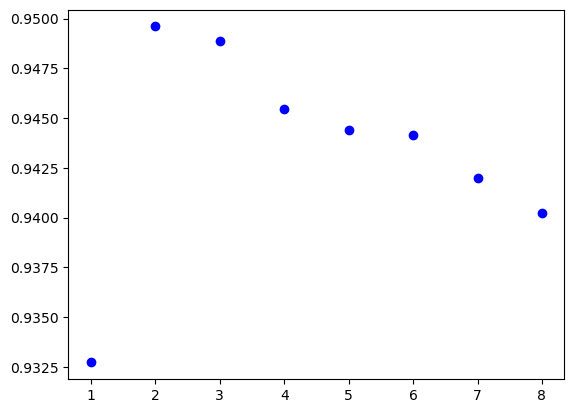

In [17]:

from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
%matplotlib inline

cc_val =[]
rmse_val =[]
acc_val =[]
for K in range(8):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    acc= r2_score (y_test,pred) #calculate accuracy
    acc_val.append(acc) #store accuracy to list
    print('Accuracy value for k= ' , K , 'is:', acc)
    


# here I varied the value of K to check how result vary
plt.scatter(range(1,9),acc_val,c='b')
plt.show()

In [18]:
#Cross Validation and loout cv result for  KNN
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(model,X, Y, cv=4)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(model,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))

          0
0  0.931309
1  0.925542
2  0.910133
3  0.895875
Mean 0.9157148091431387
STD 0.013825000684072903

LeaveOneOut CV

Mean 0.9220091745417835
STD 0.016249456836913728
Individual Accuracies
          0
0  0.929686
1  0.948059
2  0.911763
3  0.920320
4  0.900218


# PCA calculation

In [19]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_x= pca.fit_transform(X)
pd.DataFrame(pca_x)
print (pd.DataFrame(pca.explained_variance_ratio_))


              0
0  3.126578e-01
1  1.907311e-01
2  1.406506e-01
3  1.228816e-01
4  8.949835e-02
5  5.790937e-02
6  4.166778e-02
7  2.482799e-02
8  1.917548e-02
9  9.821083e-30


In [20]:
#PCA 2 components.
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
pca_x_2= pca.fit_transform(X)
display (pd.DataFrame(pca_x_2))
print (pd.DataFrame(pca.explained_variance_ratio_))

pca_x_train, pca_x_test, y_train, y_test = train_test_split(pca_x , Y, test_size = 0.2, random_state = 0)
print (pca_x.shape)
print (pca_x_train.shape)
print (pca_x_test.shape)


,0,1
0,1.249379,-1.433446
1,0.936745,1.285287
2,2.276258,-1.176471
3,0.152227,1.054048
4,0.716596,-2.405571
...,...,...
10663,0.606082,-2.573507
10664,0.550529,-2.606081
10665,0.533090,-2.635057
10666,-0.927552,-0.482538


          0
0  0.312658
1  0.190731
(10668, 10)
(8534, 10)
(2134, 10)


#  LDA calculation

In [21]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda_x = lda.fit_transform(X, Y)
display (pd.DataFrame(lda_x))
print("\n")
print("variance_ratio = ",lda.explained_variance_ratio_)


lda_x_train, lda_x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 0)
print (lda_x.shape)
print (lda_x_train.shape)
print (lda_x_test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,0,1,2,3,4,5,6,7,8
0,-1.987617,-1.020823,0.009326,-1.143379,0.166382,0.595881,0.885047,-0.443937,-1.261436
1,-1.531618,1.247599,0.788364,0.904356,1.520661,0.463392,-0.534738,-0.318192,1.762762
2,-3.742736,0.873433,0.648217,-0.211303,1.029289,-0.721032,1.103046,0.307471,-0.612110
3,-0.168770,-0.760999,0.334780,-0.127785,0.336692,1.989712,-0.536442,-1.483806,1.087976
4,-0.252101,-1.960580,0.540998,-0.259052,0.322525,0.241354,0.625691,0.119685,-1.529900
...,...,...,...,...,...,...,...,...,...
10663,0.508347,-2.012979,1.161328,0.098528,-0.248116,0.401357,0.783240,0.120770,-1.671624
10664,0.601230,-2.098117,1.077595,-0.015954,-0.187364,0.442312,0.739507,0.082511,-1.694629
10665,0.652867,-2.106543,1.046208,-0.076937,-0.114151,0.435035,0.711313,0.075578,-1.696491
10666,0.320575,-1.288498,-0.516563,0.073416,1.604825,1.281724,0.516321,0.845570,1.262047




variance_ratio =  [0.74659244 0.06416244 0.04345471 0.02950344 0.02807876 0.02544242
 0.02374879 0.02074691 0.0182701 ]
(10668, 9)
(8534, 10)
(2134, 10)


# Multiple Regression with PCA and LDA

In [22]:

print("Multiple Regression with PCA\n")
lr_pca = LinearRegression()
lr_pca = lr_pca.fit (pca_x_train ,y_train )
y_pred_pca =  lr_pca.predict (pca_x_test)
accuracy = r2_score(y_test,y_pred_pca)
print ("Test accuracy = ",accuracy,"\n")
print("lr.coef_ = ",lr.coef_,"\n")
print("lr.intercept_ = ",lr.intercept_,"\n")
y_pred_pca =  lr_pca.predict (pca_x_train)
accuracy = r2_score(y_train,y_pred_pca)
print ("Training accuracy = ",accuracy,"\n")

print("\nMultiple Regression with LDA\n")


lr_lda = LinearRegression()
lr_lda = lr_lda.fit (lda_x_train ,y_train )
y_pred_lda =  lr_lda.predict (lda_x_test)
accuracy = r2_score(y_test,y_pred_lda)
print ("Test accuracy = ",accuracy,"\n")
print("lr.coef_ = ",lr.coef_,"\n")
print("lr.intercept_ = ",lr.intercept_,"\n")
print("\n")

y_pred_lda =  lr_lda.predict (lda_x_train)
accuracy = r2_score(y_train,y_pred_lda)
print ("Training accuracy = ",accuracy,"\n")


Multiple Regression with PCA

Test accuracy =  0.7916219936369394 

lr.coef_ =  [[-3.79631154e+16 -4.28951122e+16 -4.12205025e+16  1.45194160e+03
   4.40316359e+03 -2.23102688e+03  5.56638221e+02 -1.44572874e+03
  -2.07830592e+03  6.39872515e+03]] 

lr.intercept_ =  [22901.75937793] 

Training accuracy =  0.7904884247513504 


Multiple Regression with LDA

Test accuracy =  0.7915565638111468 

lr.coef_ =  [[-3.79631154e+16 -4.28951122e+16 -4.12205025e+16  1.45194160e+03
   4.40316359e+03 -2.23102688e+03  5.56638221e+02 -1.44572874e+03
  -2.07830592e+03  6.39872515e+03]] 

lr.intercept_ =  [22901.75937793] 



Training accuracy =  0.7904352927656382 



In [23]:
#Cross Validation and lout cv on pca for Multiple Regression
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(lr_pca,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(lr_pca,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))




          0
0  0.810706
1  0.791904
2  0.735099
3  0.701100
4  0.768880
Mean 0.7615379117872049
STD 0.03935817719810326

LeaveOneOut CV

Mean 0.7615379117872049
STD 0.03935817719810326
Individual Accuracies
          0
0  0.810706
1  0.791904
2  0.735099
3  0.701100
4  0.768880


In [24]:
#Cross Validation and loout cv on lda resuts for Multiple Regression
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(lr_lda,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(lr_lda,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))




          0
0  0.810706
1  0.791904
2  0.735099
3  0.701100
4  0.768880
Mean 0.7615379117872049
STD 0.03935817719810326

LeaveOneOut CV

Mean 0.7615379117872049
STD 0.03935817719810326
Individual Accuracies
          0
0  0.810706
1  0.791904
2  0.735099
3  0.701100
4  0.768880


In [25]:
# Decision Tree  with PCA

print("Decision Tree with PCA\n")
split_dt =DecisionTreeRegressor()
split_dt .fit(pca_x_train,y_train)
print (split_dt )
split_pred = split_dt.predict (pca_x_test)
#print (split_pred)

acc= r2_score (y_test,split_pred)
print("Test accuracy = ",acc)

split_pred = split_dt.predict (pca_x_train)
acc= r2_score (y_train,split_pred)
print("train accuracy = ",acc)





Decision Tree with PCA

DecisionTreeRegressor()
Test accuracy =  0.921895987965929
train accuracy =  0.9988719529065915


In [26]:
#Cross Validation on decisio tree with pca on decision tree
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(split_dt,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(split_dt,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))




          0
0  0.923632
1  0.924242
2  0.927407
3  0.915123
4  0.907252
Mean 0.9195311157284616
STD 0.007365475159441689

LeaveOneOut CV

Mean 0.9139086787936357
STD 0.01139215717132203
Individual Accuracies
          0
0  0.922106
1  0.912072
2  0.928715
3  0.895107
4  0.911544


In [27]:
#Decision Tree with LDA

print("\nDecision Tree with LDA\n")

split_dt =DecisionTreeRegressor()
split_dt .fit(lda_x_train,y_train)
print (split_dt )
split_pred = split_dt.predict (lda_x_test)
#print (split_pred)

acc= r2_score (y_test,split_pred)
print("Test accuracy = ",acc)

split_pred = split_dt.predict (lda_x_train)
acc= r2_score (y_train,split_pred)
print("train accuracy = ",acc)


Decision Tree with LDA

DecisionTreeRegressor()
Test accuracy =  0.8945995454170546
train accuracy =  0.9988719529065915


In [28]:
#Cross Validation on decisio tree with pca 
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(split_dt,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(split_dt,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))




          0
0  0.918990
1  0.923258
2  0.926480
3  0.911048
4  0.911754
Mean 0.918306068551745
STD 0.0061224711760347085

LeaveOneOut CV

Mean 0.9134075954921933
STD 0.012021692844333309
Individual Accuracies
          0
0  0.922770
1  0.921031
2  0.923753
3  0.892802
4  0.906682


0.9091315699970258
0.9017482043416214


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9305915808153797
0.9374387243609367


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9330633724911722


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9376524135185828


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9409876111115975


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9407208349223773


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9410547969736528


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9438483043521754


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9453046776057124


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.947156073295565


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9418493781603564


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


0.9427148267099166
0.947156073295565


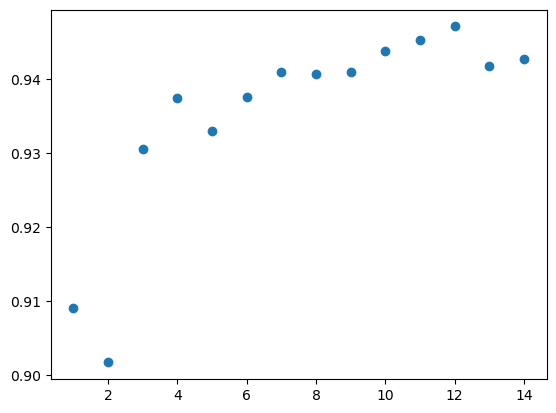

C:\Users\prath\AppData\Local\Temp\ipykernel_15764\4101686665.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(pca_x_train,y_train)


train accuracy =  0.9897511625440133


In [29]:
#random forest pca

from sklearn.ensemble import RandomForestRegressor
acc=[]
for i in range(1,15):
    rf= RandomForestRegressor (n_estimators =i)
    rf.fit(pca_x_train,y_train)
    #print (rf)
    y_pred = rf.predict(pca_x_test)
    #print (y_pred)
    acc.append( r2_score(y_test,y_pred))
    print( r2_score(y_test,y_pred))
print(max(acc))
plt.scatter(range(1,15),acc)
plt.show()

rf= RandomForestRegressor (n_estimators =13)
rf.fit(pca_x_train,y_train)
y_pred = rf.predict(pca_x_train)
print( "train accuracy = ",r2_score(y_train,y_pred))

In [30]:
#Cross Validation and loout on decisio tree with pca

from sklearn.model_selection import cross_val_score
cvm= cross_val_score(rf,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(rf,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

          0
0  0.947052
1  0.956572
2  0.948229
3  0.942365
4  0.924241
Mean 0.9436919208080596
STD 0.010750763529911616

LeaveOneOut CV



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Mean 0.9468594418539894
STD 0.008622003267297623
Individual Accuracies
          0
0  0.945964
1  0.961486
2  0.949921
3  0.940278
4  0.936648


0.928257782336481
0.9303566399874318
0.9413350464744388
0.9581731985750811


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y

0.9393924559166238
0.946783168720667


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)


0.9364955843486511
0.9554833349917632


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)


0.9508539579157961
0.9505046938635826


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)
C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)


0.9508655207224829


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)


0.9536556833023303


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)


0.9532991208808116


C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)


0.9501105127315036
0.9581731985750811


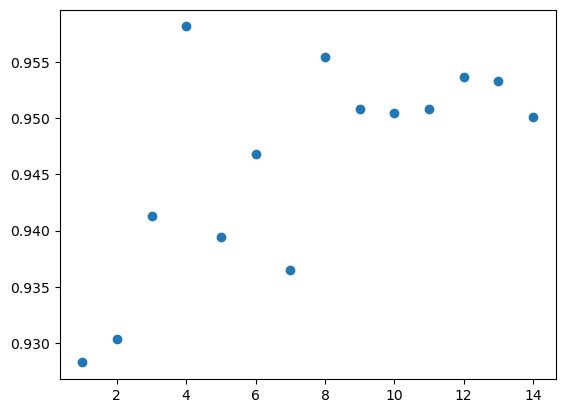

C:\Users\prath\AppData\Local\Temp\ipykernel_15764\2327976137.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(lda_x_train,y_train)


train accuracy =  0.9914168490261941


In [31]:
#LDA + RandomforestRegressor
from sklearn.ensemble import RandomForestRegressor
acc=[]
#I have changed the value of estimators to check how the results vary and plotted them.

for i in range(1,15):
    rf= RandomForestRegressor (n_estimators =i)
    rf.fit(lda_x_train,y_train)
    #print (rf)
    y_pred = rf.predict(lda_x_test)
    #print (y_pred)
    acc.append( r2_score(y_test,y_pred))
    print( r2_score(y_test,y_pred))
print(max(acc))
plt.scatter(range(1,15),acc)
plt.show()

rf= RandomForestRegressor (n_estimators =13)
rf.fit(lda_x_train,y_train)
y_pred = rf.predict(lda_x_train)
print( "train accuracy = ",r2_score(y_train,y_pred))

In [32]:
#Cross Validation and loout cv on decisio tree with lda
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(rf,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(rf,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

          0
0  0.946863
1  0.949960
2  0.948989
3  0.944246
4  0.923387
Mean 0.9426889321639036
STD 0.009848562071824433

LeaveOneOut CV



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Mean 0.9449979638527151
STD 0.008751279619798335
Individual Accuracies
          0
0  0.948027
1  0.955357
2  0.950044
3  0.941741
4  0.929820


Accuracy value for k=  1 is: 0.9329865132244857
Accuracy value for k=  2 is: 0.9495636874910692
Accuracy value for k=  3 is: 0.9488136268933082
Accuracy value for k=  4 is: 0.9453323326085189
Accuracy value for k=  5 is: 0.944309348712487
Accuracy value for k=  6 is: 0.9440681784250534
Accuracy value for k=  7 is: 0.941932577392115
Accuracy value for k=  8 is: 0.940174848910328
max acc =  0.9495636874910692


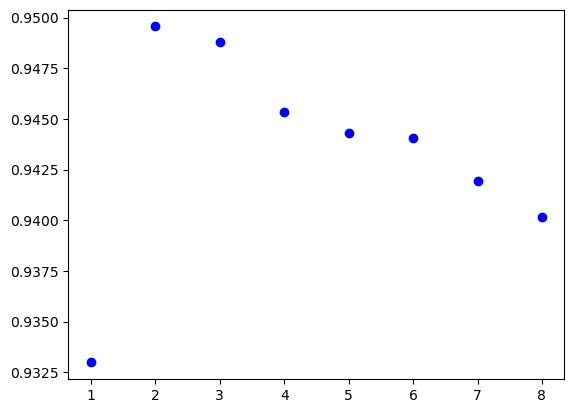

0.9813409232876724


In [33]:
#KNN +pca
cc_val =[]
rmse_val =[]
acc_val =[]
for K in range(8):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(pca_x_train, y_train)  #fit the model
    pred=model.predict(pca_x_test) #make prediction on test set
    acc= r2_score (y_test,pred) #calculate accuracy
    acc_val.append(acc) #store accuracy to list
    print('Accuracy value for k= ' , K , 'is:', acc)
    


print("max acc = ",max(acc_val))
plt.scatter(range(1,9),acc_val,c='b')
plt.show()

model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(pca_x_train, y_train) 
pred=model.predict(pca_x_train)
acc= r2_score (y_train,pred)
print(acc)

In [34]:
#Cross Validation on decisio tree with lda
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(model,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(model,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))



          0
0  0.932097
1  0.956530
2  0.911665
3  0.905771
4  0.905280
Mean 0.9222685934990643
STD 0.019716212221661956

LeaveOneOut CV

Mean 0.9222685934990643
STD 0.019716212221661956
Individual Accuracies
          0
0  0.932097
1  0.956530
2  0.911665
3  0.905771
4  0.905280


Accuracy value for k=  1 is: 0.9327197482751275
Accuracy value for k=  2 is: 0.9496035108839098
Accuracy value for k=  3 is: 0.9488589371552903
Accuracy value for k=  4 is: 0.9454415601535769
Accuracy value for k=  5 is: 0.9444006384427169
Accuracy value for k=  6 is: 0.9441427874601295
Accuracy value for k=  7 is: 0.9419808147509898
Accuracy value for k=  8 is: 0.9402366375936287
max acc =  0.9496035108839098


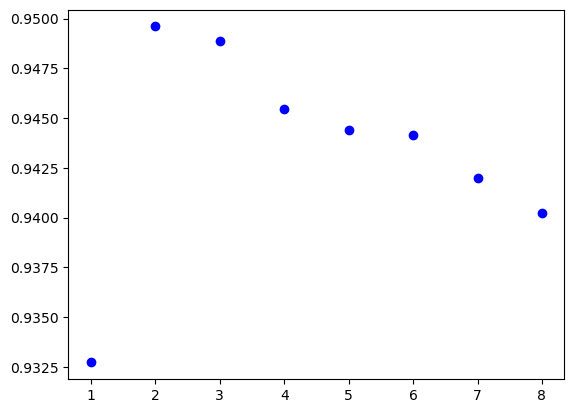

0.9812629441511969


In [35]:
#KNN + lda
cc_val =[]
rmse_val =[]
acc_val =[]
for K in range(8):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(lda_x_train, y_train)  #fit the model
    pred=model.predict(lda_x_test) #make prediction on test set
    acc= r2_score (y_test,pred) #calculate accuracy
    acc_val.append(acc) #store accuracy to list
    print('Accuracy value for k= ' , K , 'is:', acc)
    


print("max acc = ",max(acc_val))
plt.scatter(range(1,9),acc_val,c='b')
plt.show()

model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(lda_x_train, y_train) 
pred=model.predict(lda_x_train)
acc= r2_score (y_train,pred)
print(acc)

In [36]:
#Cross Validation and loout cv on decisio tree with lda
from sklearn.model_selection import cross_val_score
cvm= cross_val_score(model,X, Y, cv=5)
print(pd.DataFrame(cvm))
print ('Mean', cvm.mean())
print ('STD',cvm.std())


print("\nLeaveOneOut CV\n")
from sklearn.model_selection import LeaveOneOut
loout =LeaveOneOut()
loo_results = cross_val_score(model,X, Y, cv=5)
print ('Mean', loo_results.mean())
print ('STD',loo_results.std())
print ('Individual Accuracies')
print (pd.DataFrame(loo_results))



          0
0  0.932097
1  0.956530
2  0.911665
3  0.905771
4  0.905280
Mean 0.9222685934990643
STD 0.019716212221661956

LeaveOneOut CV

Mean 0.9222685934990643
STD 0.019716212221661956
Individual Accuracies
          0
0  0.932097
1  0.956530
2  0.911665
3  0.905771
4  0.905280
